In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import polars as pl
import os
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

In [44]:
train_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
data_dictionary = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

## EDA

In [45]:
train_df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [46]:
train_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [47]:
# check the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [48]:
train_df.shape

(3960, 82)

In [49]:
test_df.shape

(20, 59)

In [50]:
data_dictionary.shape

(81, 6)

In [51]:
list(data_dictionary['Type'].unique())

['str', 'float', 'categorical int', 'int']

In [52]:
data_dictionary[
data_dictionary['Type'].str.contains('categorical')
].shape[0]

31

In [53]:
data_dictionary[
data_dictionary['Type'].str.contains('str')
].shape[0]

12

In [54]:
data_dictionary[
data_dictionary['Type'].str.contains('float')
].shape[0]

24

In [55]:
data_dictionary[
data_dictionary['Type'].str.contains('int') & ~data_dictionary['Type'].str.contains('categorical')
].shape[0]

14

In [56]:
# Check for missing values
train_df.isna().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64

In [57]:
# Create enum to map for `sii` levels including "Missing" for NaNs
sii_dict = {
    0: "None",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    "missing": "Missing Data"
}

# create new column to fill missing values in column sii
train_df['sii_filled'] = train_df['sii'].fillna("missing")

# create new column sii_label to map the whole column sii with the enum
train_df['sii_label'] = train_df['sii_filled'].map(sii_dict)


In [58]:
train_df

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,sii_filled,sii_label
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,2.0,Moderate
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0.0,None
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,0.0,None
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,1.0,Mild
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,Missing Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0,1.0,Mild
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN,missing,Missing Data
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0,1.0,Mild
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0,0.0,None


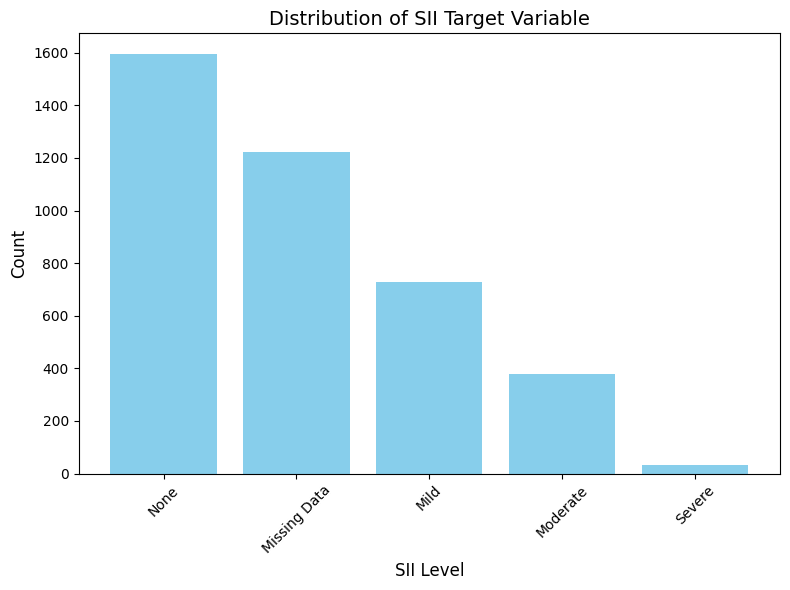

In [59]:
# Count occurrences and percentages for each SII level
sii_counts = train_df['sii_label'].value_counts()

# Create a DataFrame for plotting
sii_data = pd.DataFrame({
    'SII Level': sii_counts.index,
    'Count': sii_counts.values
})

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sii_data['SII Level'], sii_data['Count'], color='skyblue')

# Add labels and title
plt.xlabel('SII Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of SII Target Variable', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_30/2765491876.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.5, hspace=0.8)


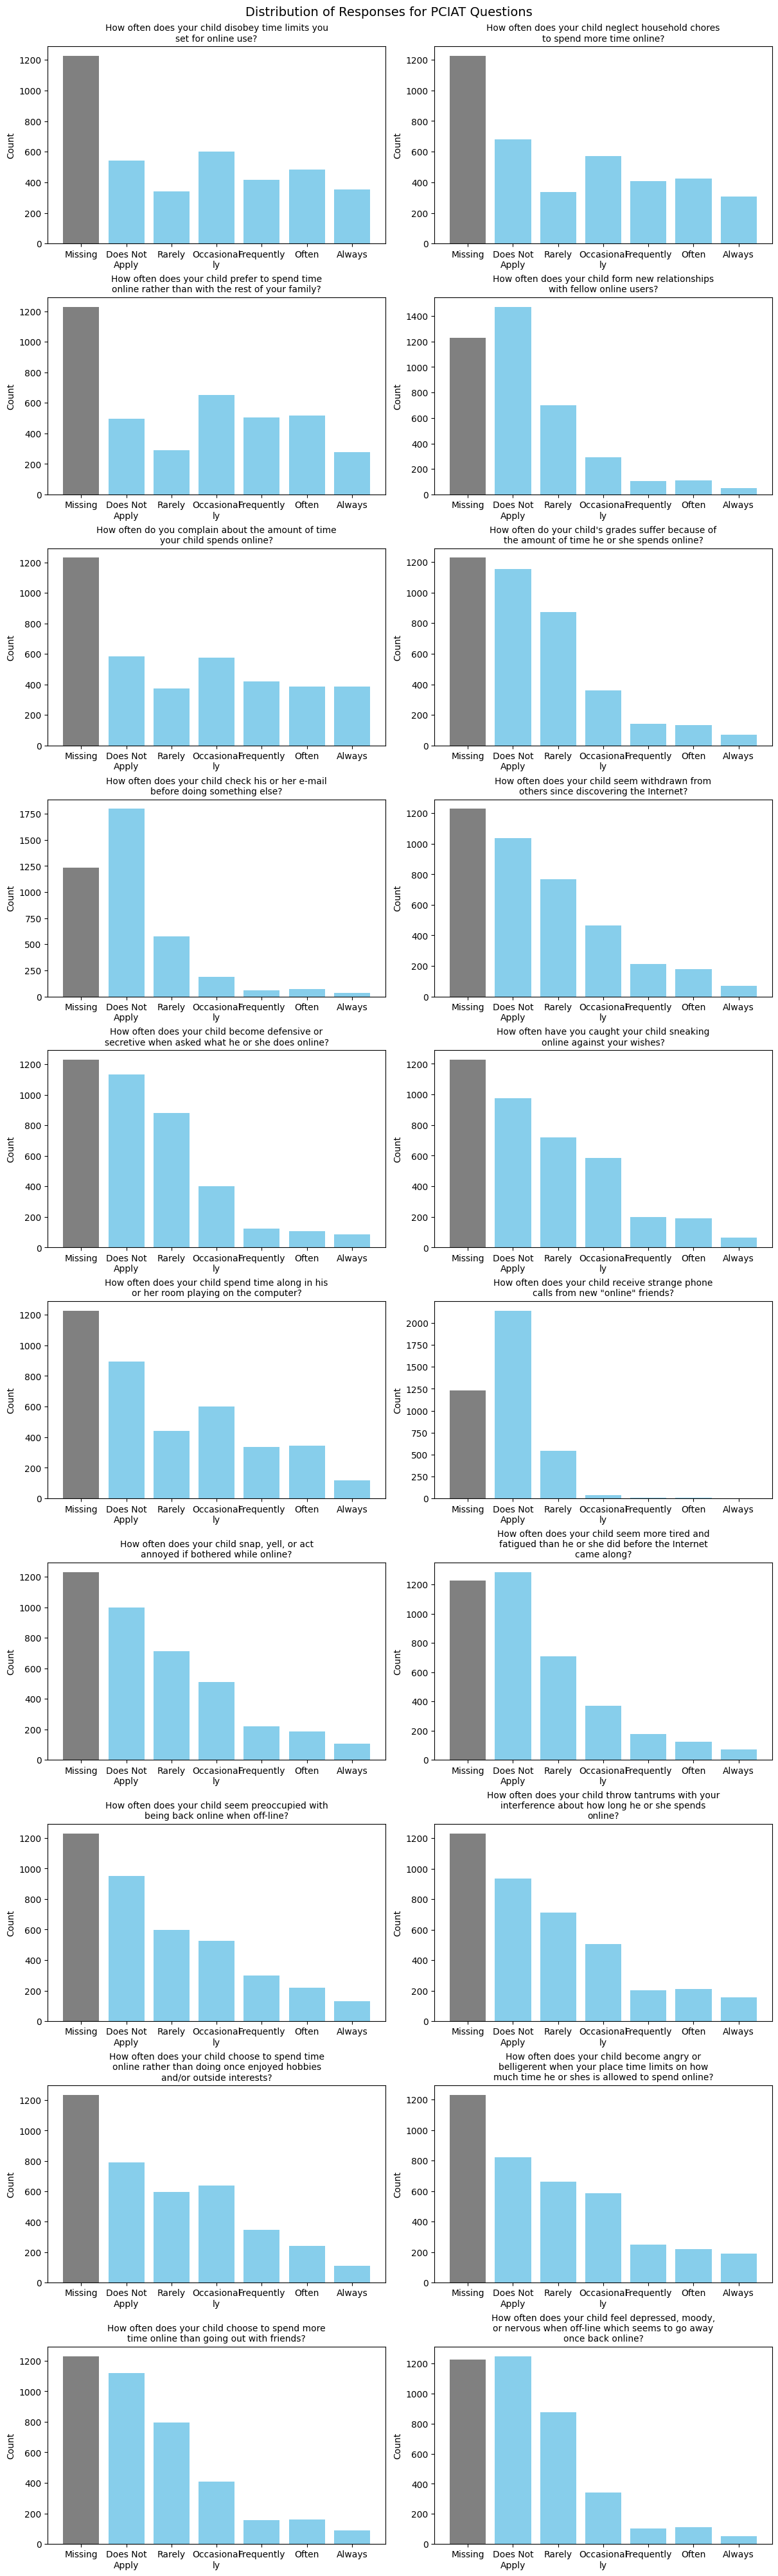

In [60]:
from textwrap import wrap

pciat_columns = [col for col in train_df.columns if col.startswith('PCIAT-PCIAT_') and col != 'PCIAT-PCIAT_Total']

pciat_question_map = dict(zip(data_dictionary['Field'], data_dictionary['Description']))

scale_explanation = {
    "missing": "Missing",
    0: "Does Not Apply",
    1: "Rarely",
    2: "Occasionally",
    3: "Frequently",
    4: "Often",
    5: "Always"
}

# Bọc text để tránh dài dòng
def wrap_text(text, width):
    return "\n".join(wrap(text, width))

# Số lượng cột và hàng
num_cols = 2
num_rows = (len(pciat_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(pciat_columns):
    ax = axes[i]
    response_counts = train_df[col].value_counts().sort_index()
    missing_count = train_df[col].isna().sum()
    
    # Dữ liệu nhãn và giá trị
    response_labels = ['Missing'] + response_counts.index.map(scale_explanation).tolist()
    response_values = [missing_count] + response_counts.values.tolist()
    
    # Bọc nhãn x và tiêu đề
    response_labels_wrapped = [wrap_text(label, width=10) for label in response_labels]
    title_wrapped = wrap_text(pciat_question_map.get(col, "Unknown Question"), width=50)
    
    # Vẽ biểu đồ
    ax.bar(response_labels_wrapped, response_values, color=['gray'] + ['skyblue'] * len(response_counts))
    ax.set_title(title_wrapped, fontsize=10)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

# Loại bỏ subplot thừa
for j in range(len(pciat_columns), len(axes)):
    fig.delaxes(axes[j])

# Tăng khoảng cách giữa các subplot
fig.subplots_adjust(wspace=0.5, hspace=0.8)

plt.suptitle("Distribution of Responses for PCIAT Questions", fontsize=14)
plt.show()


In [61]:
# Check Internet Daily Use
train_df["PreInt_EduHx-computerinternet_hoursday"].value_counts(dropna=False, normalize=True)

PreInt_EduHx-computerinternet_hoursday
0.0    0.384848
2.0    0.253535
NaN    0.166414
1.0    0.104293
3.0    0.090909
Name: proportion, dtype: float64

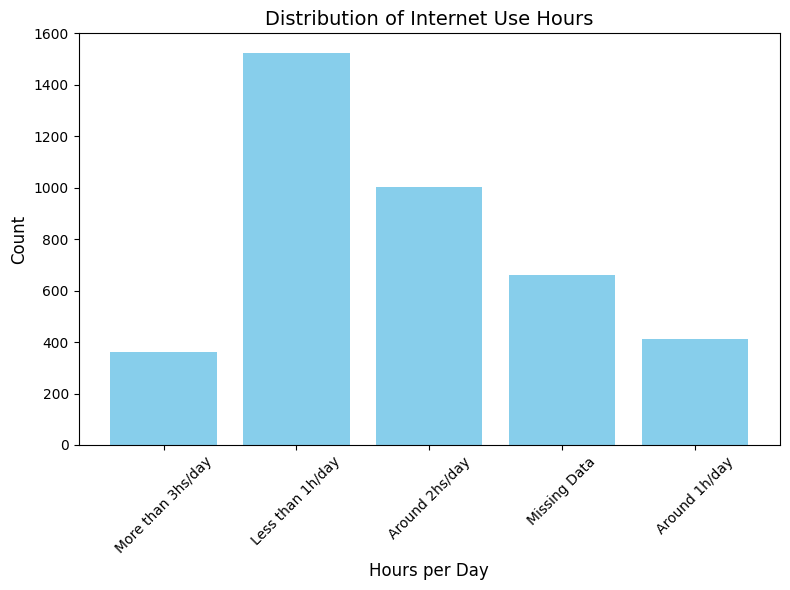

In [62]:
# Map for Internet use hours
internet_hours_map = {
    0: "Less than 1h/day",
    1: "Around 1h/day",
    2: "Around 2hs/day",
    3: "More than 3hs/day",
    "missing": "Missing Data"
}

# Replace NaN values with "missing" and map values to descriptions
train_df['Internet_Use_Hours'] = train_df['PreInt_EduHx-computerinternet_hoursday'].map(
    lambda x: internet_hours_map.get(x, internet_hours_map["missing"])
)

# Count occurrences
internet_use_counts = train_df['Internet_Use_Hours'].value_counts(sort=False)

# Create DataFrame for plotting
internet_use_data = pd.DataFrame({
    'Hours per Day': internet_use_counts.index,
    'Count': internet_use_counts.values
})

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(internet_use_data['Hours per Day'], internet_use_data['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Hours per Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Internet Use Hours', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


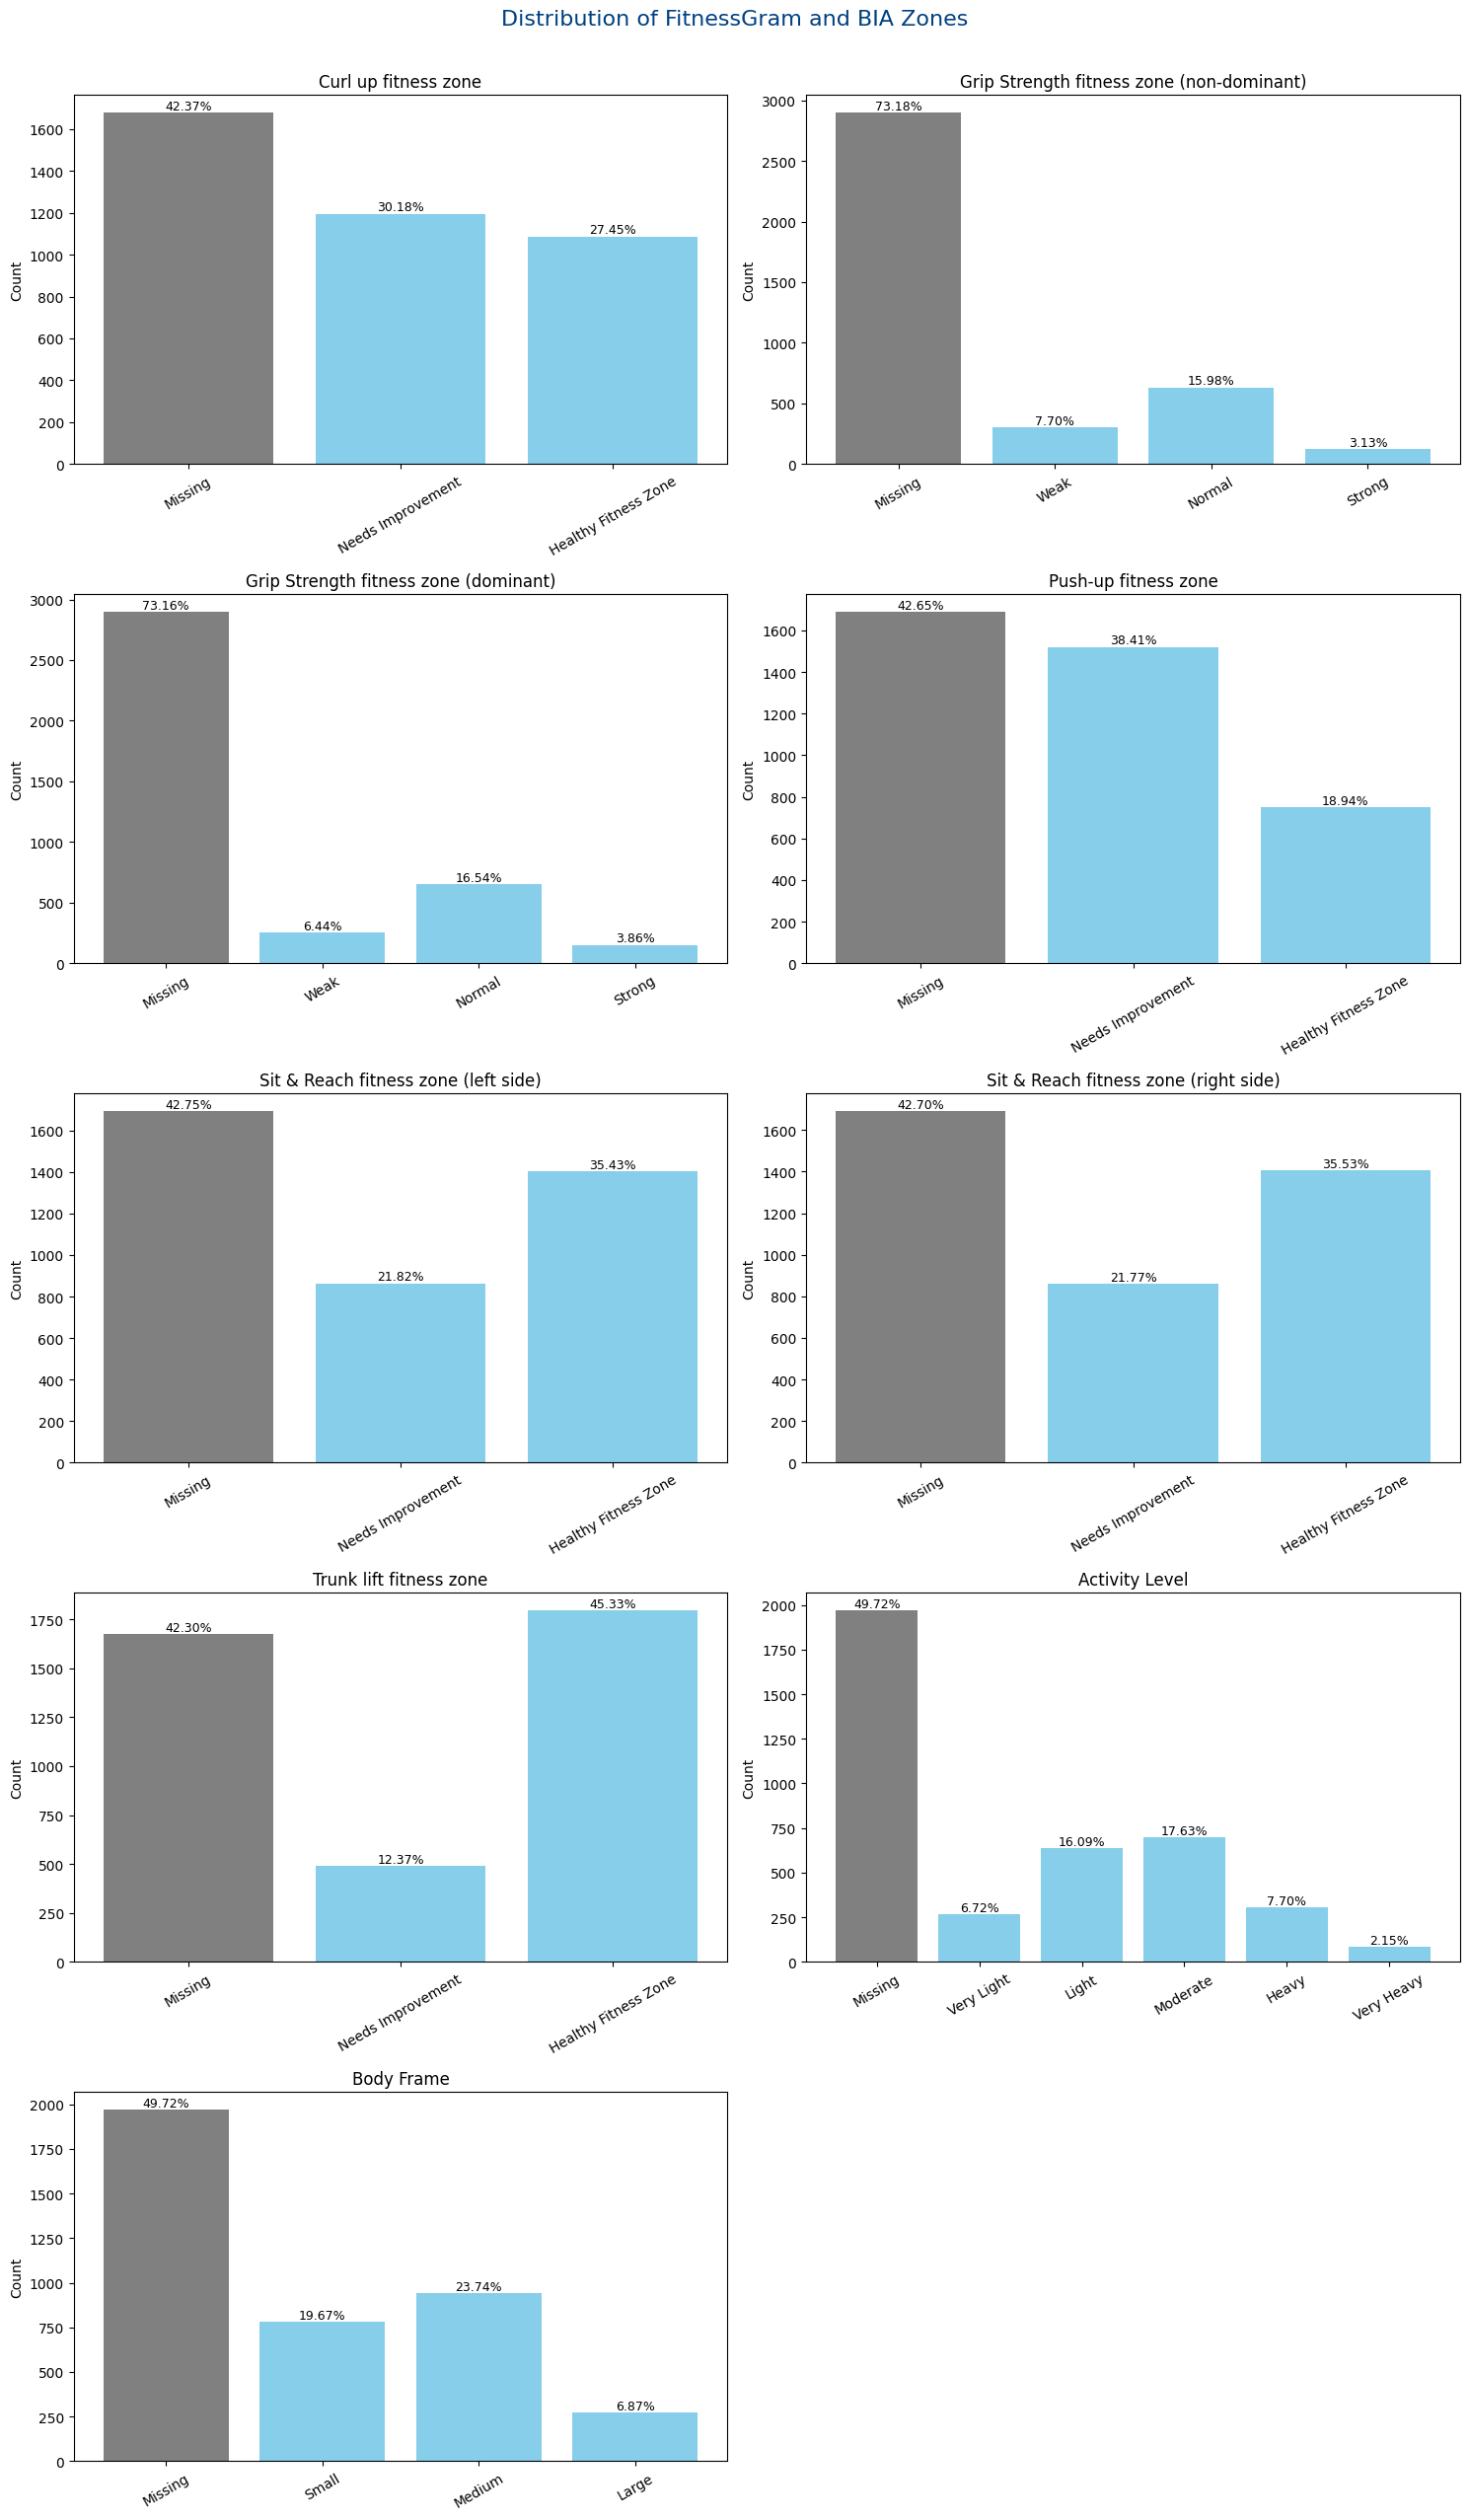

In [63]:
fitness_bio_categories = {
    'FGC-FGC_CU_Zone': {0: "Needs Improvement", 1: "Healthy Fitness Zone"},
    'FGC-FGC_GSND_Zone': {1: "Weak", 2: "Normal", 3: "Strong"},
    'FGC-FGC_GSD_Zone': {1: "Weak", 2: "Normal", 3: "Strong"},
    'FGC-FGC_PU_Zone': {0: "Needs Improvement", 1: "Healthy Fitness Zone"},
    'FGC-FGC_SRL_Zone': {0: "Needs Improvement", 1: "Healthy Fitness Zone"},
    'FGC-FGC_SRR_Zone': {0: "Needs Improvement", 1: "Healthy Fitness Zone"},
    'FGC-FGC_TL_Zone': {0: "Needs Improvement", 1: "Healthy Fitness Zone"},
    'BIA-BIA_Activity_Level_num': {1: "Very Light", 2: "Light", 3: "Moderate", 4: "Heavy", 5: "Very Heavy"},
    'BIA-BIA_Frame_num': {1: "Small", 2: "Medium", 3: "Large"}
}

fitness_bio_titles = {
    'FGC-FGC_CU_Zone': "Curl up fitness zone",
    'FGC-FGC_GSND_Zone': "Grip Strength fitness zone (non-dominant)",
    'FGC-FGC_GSD_Zone': "Grip Strength fitness zone (dominant)",
    'FGC-FGC_PU_Zone': "Push-up fitness zone",
    'FGC-FGC_SRL_Zone': "Sit & Reach fitness zone (left side)",
    'FGC-FGC_SRR_Zone': "Sit & Reach fitness zone (right side)",
    'FGC-FGC_TL_Zone': "Trunk lift fitness zone",
    'BIA-BIA_Activity_Level_num': "Activity Level",
    'BIA-BIA_Frame_num': "Body Frame"
}

num_cols = 2  # Number of columns
num_rows = (len(fitness_bio_categories) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Colors
missing_color = "gray"
bar_color = "skyblue"

# Iterate over each field
for i, (col, categories) in enumerate(fitness_bio_categories.items()):
    ax = axes[i]
    
    response_counts = train_df[col].value_counts(dropna=False).sort_index()

    # Create DataFrame for plotting with mapped categories and calculate percentages
    response_data = pd.DataFrame({
        'Response': response_counts.index.map(lambda x: "Missing" if pd.isna(x) else categories.get(x, str(x))),
        'Count': response_counts.values
    })
    response_data['Percentage'] = (response_data['Count'] / response_data['Count'].sum()) * 100
    
    category_order = ["Missing"] + list(categories.values())
    response_data['Response'] = pd.Categorical(response_data['Response'], categories=category_order, ordered=True)
    response_data = response_data.sort_values('Response')  # Sort by the defined order
    
    ax.bar(response_data['Response'], response_data['Count'], color=[missing_color if resp == "Missing" else bar_color for resp in response_data['Response']])
    ax.set_title(fitness_bio_titles[col], fontsize=12)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=30)
    
    for j, value in enumerate(response_data['Count']):
        ax.text(j, value + 1, f'{response_data["Percentage"].iloc[j]:.2f}%', ha='center', va='bottom', fontsize=9)

# Remove unused subplots
for j in range(len(fitness_bio_categories), len(axes)):
    fig.delaxes(axes[j])

# Layout adjustments
plt.tight_layout()
plt.suptitle("Distribution of FitnessGram and BIA Zones", fontsize=16, color="#004080", y=1.02)
plt.show()


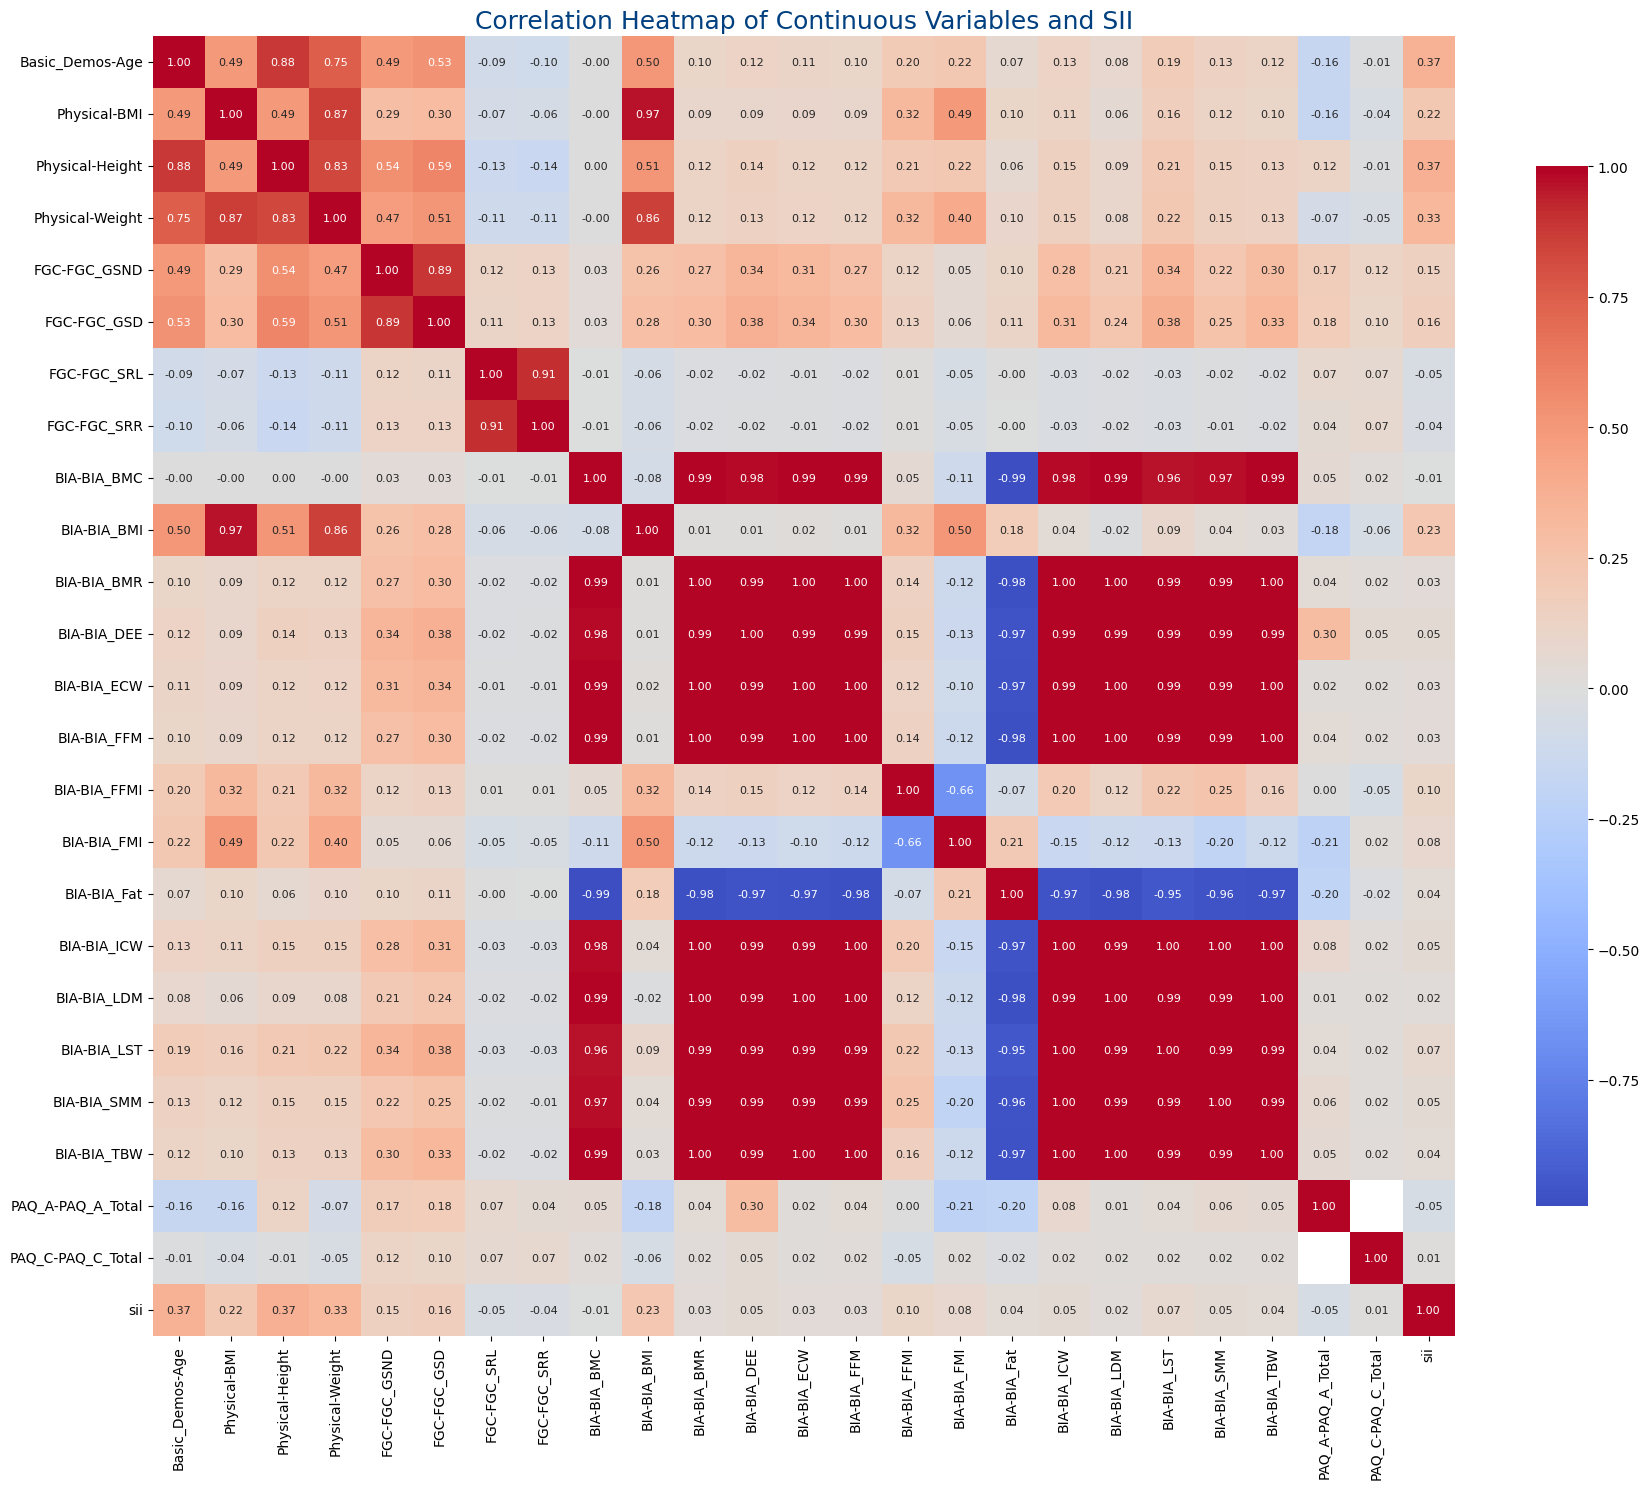

In [64]:
continuous_columns = [
    'Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
    'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_SRL', 'FGC-FGC_SRR',
    'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
    'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
    'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST',
    'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'sii'
]

correlation_matrix = train_df[continuous_columns].corr()

plt.figure(figsize=(18, 15)) 
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f",  # Format 2 decimal places
    cmap="coolwarm", 
    center=0, 
    annot_kws={"size": 8},  # Set annotation font size smaller
    cbar_kws={"shrink": 0.8}  # Shrink color bar slightly
)

# Adjust the labels for readability
plt.xticks(rotation=90, fontsize=10)  # Rotate x labels 90 degree
plt.yticks(rotation=0, fontsize=10)   # Keep y labels horizontal
plt.title("Correlation Heatmap of Continuous Variables and SII", fontsize=18, color="#004080")
plt.tight_layout() 

plt.show()

In [65]:
train_df.isna().sum()[train_df.isna().sum() > 0]

CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 78, dtype: int64

In [66]:
def get_common_features(train_df, test_df):
        return list(set(train_df.columns) & set(test_df.columns))

common_features = get_common_features(train_df, test_df)
common_features

['SDS-SDS_Total_Raw',
 'Physical-Height',
 'PAQ_C-Season',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_TL_Zone',
 'BIA-BIA_ECW',
 'BIA-BIA_BMC',
 'FGC-FGC_CU_Zone',
 'BIA-BIA_SMM',
 'BIA-BIA_Fat',
 'FGC-FGC_GSD_Zone',
 'Basic_Demos-Sex',
 'FGC-FGC_PU',
 'BIA-BIA_FMI',
 'PreInt_EduHx-Season',
 'BIA-BIA_TBW',
 'id',
 'FGC-FGC_GSD',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'BIA-BIA_BMR',
 'FGC-Season',
 'PAQ_A-PAQ_A_Total',
 'Physical-BMI',
 'BIA-BIA_LST',
 'PAQ_C-PAQ_C_Total',
 'BIA-BIA_FFM',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Time_Mins',
 'FGC-FGC_CU',
 'Fitness_Endurance-Time_Sec',
 'Physical-HeartRate',
 'CGAS-Season',
 'BIA-BIA_DEE',
 'FGC-FGC_GSND',
 'CGAS-CGAS_Score',
 'FGC-FGC_SRR',
 'FGC-FGC_GSND_Zone',
 'PAQ_A-Season',
 'Physical-Systolic_BP',
 'BIA-BIA_ICW',
 'SDS-Season',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Waist_Circumference',
 'BIA-BIA_LDM',
 'Basic_Demos-Enroll_Season',
 'BIA-Season',
 'BIA-BIA_Frame_num',
 'Fitness_Endurance-Max_Stage',
 'FGC-FGC_SRR_Zone',

In [67]:
def process_file(filename, dirname):
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    return df.describe().values.reshape(-1), filename.split('=')[1]

def load_time_series(dirname) -> pd.DataFrame:
    ids = os.listdir(dirname)
    
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_file(fname, dirname), ids), total=len(ids)))
    
    stats, indexes = zip(*results)
    
    df = pd.DataFrame(stats, columns=[f"stat_{i}" for i in range(len(stats[0]))])
    df['id'] = indexes
    return df

In [68]:
train_ts = load_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet")
test_ts = load_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet")

100%|██████████| 2/2 [00:00<00:00, 10.65it/s]


In [69]:
train_ts

,stat_0,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6,stat_7,stat_8,stat_9,...,stat_87,stat_88,stat_89,stat_90,stat_91,stat_92,stat_93,stat_94,stat_95,id
0,50458.0,50458.0,50458.0,50458.0,50458.0,50458.0,50458.0,50458.0,50458.0,50458.0,...,5.314874,89.422226,0.0,2626.199951,4187.0,8.639500e+13,7.0,2.0,57.0,0745c390
1,340584.0,340584.0,340584.0,340584.0,340584.0,340584.0,340584.0,340584.0,340584.0,340584.0,...,3.966906,89.080330,1.0,2628.199951,4146.0,8.639500e+13,7.0,2.0,243.0,eaab7a96
2,40003.0,40003.0,40003.0,40003.0,40003.0,40003.0,40003.0,40003.0,40003.0,40003.0,...,5.066334,86.987267,0.0,2618.199951,4183.0,8.636500e+13,7.0,3.0,134.0,8ec2cc63
3,223915.0,223915.0,223915.0,223915.0,223915.0,223915.0,223915.0,223915.0,223915.0,223915.0,...,6.134459,89.976074,0.0,2502.000000,6000.0,8.639500e+13,7.0,4.0,72.0,b2987a65
4,15420.0,15420.0,15420.0,15420.0,15420.0,15420.0,15420.0,15420.0,15420.0,15420.0,...,2.774382,89.300034,0.0,1046.800049,4199.0,8.601500e+13,7.0,4.0,76.0,7b8842c3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,394128.0,394128.0,394128.0,394128.0,394128.0,394128.0,394128.0,394128.0,394128.0,394128.0,...,3.669502,89.025551,1.0,2576.399902,4191.0,8.639500e+13,7.0,4.0,161.0,cd68643b
992,1195.0,1195.0,1195.0,1195.0,1195.0,1195.0,1195.0,1195.0,1195.0,1195.0,...,1.786410,81.665283,0.0,1526.599976,4194.0,8.514000e+13,7.0,2.0,130.0,f8ff0bc8
993,393240.0,393240.0,393240.0,393240.0,393240.0,393240.0,393240.0,393240.0,393240.0,393240.0,...,3.692727,89.333710,1.0,2592.199951,4178.0,8.639500e+13,7.0,1.0,79.0,db23fbe4
994,40085.0,40085.0,40085.0,40085.0,40085.0,40085.0,40085.0,40085.0,40085.0,40085.0,...,1.673958,88.629547,0.0,1875.199951,4183.0,8.639500e+13,7.0,1.0,155.0,687c85e7


In [70]:
common_features += train_ts.columns.tolist()
common_features.remove('id')

In [71]:
common_features

['SDS-SDS_Total_Raw',
 'Physical-Height',
 'PAQ_C-Season',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_TL_Zone',
 'BIA-BIA_ECW',
 'BIA-BIA_BMC',
 'FGC-FGC_CU_Zone',
 'BIA-BIA_SMM',
 'BIA-BIA_Fat',
 'FGC-FGC_GSD_Zone',
 'Basic_Demos-Sex',
 'FGC-FGC_PU',
 'BIA-BIA_FMI',
 'PreInt_EduHx-Season',
 'BIA-BIA_TBW',
 'FGC-FGC_GSD',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'BIA-BIA_BMR',
 'FGC-Season',
 'PAQ_A-PAQ_A_Total',
 'Physical-BMI',
 'BIA-BIA_LST',
 'PAQ_C-PAQ_C_Total',
 'BIA-BIA_FFM',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Time_Mins',
 'FGC-FGC_CU',
 'Fitness_Endurance-Time_Sec',
 'Physical-HeartRate',
 'CGAS-Season',
 'BIA-BIA_DEE',
 'FGC-FGC_GSND',
 'CGAS-CGAS_Score',
 'FGC-FGC_SRR',
 'FGC-FGC_GSND_Zone',
 'PAQ_A-Season',
 'Physical-Systolic_BP',
 'BIA-BIA_ICW',
 'SDS-Season',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Waist_Circumference',
 'BIA-BIA_LDM',
 'Basic_Demos-Enroll_Season',
 'BIA-Season',
 'BIA-BIA_Frame_num',
 'Fitness_Endurance-Max_Stage',
 'FGC-FGC_SRR_Zone',
 'Phys

In [72]:
train_df = pd.merge(train_df, train_ts, how="left", on='id')
test_df = pd.merge(test_df, test_ts, how="left", on='id')

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Columns: 181 entries, id to stat_95
dtypes: float64(164), int64(2), object(15)
memory usage: 5.5+ MB


In [74]:
categorical_cols = []
numerical_cols = []

    # Categorize columns based on their type from the data dictionary
for _, row in data_dictionary.iterrows():
        if row["Field"] in common_features:
            if row["Type"] in ["str"]:
                categorical_cols.append(row["Field"])
            else:
                numerical_cols.append(row["Field"])

for col in train_ts.columns.tolist():
    numerical_cols.append(col)
numerical_cols.remove('id')


In [77]:
categorical_cols.remove('id')

In [78]:
def preprocess_data(train_df, test_df, data_dict, target_column):
    if "id" in common_features:
        common_features.remove("id")

    print(common_features)
    # Filter the DataFrame by common features
    train_df = train_df[common_features + [target_column]]
    test_df = test_df[common_features]
    
    # Drop rows with missing target in train data
    train_df = train_df[train_df[target_column].notnull()]

    # Handle missing values
    num_imputer = SimpleImputer(strategy="median")
    cat_imputer = SimpleImputer(strategy="most_frequent")

    train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])
    train_df[numerical_cols] = num_imputer.fit_transform(train_df[numerical_cols])
    
    test_df[categorical_cols] = cat_imputer.transform(test_df[categorical_cols])
    test_df[numerical_cols] = num_imputer.transform(test_df[numerical_cols])

    # Encode categorical features
    for col in categorical_cols:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col].astype(str))
        
        # Handle unseen labels in test set
        test_df[col] = le.transform(test_df[col].astype(str)) if col in test_df else le.transform([])

    # Scale numerical features
    scaler = StandardScaler()
    train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
    test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

    # Separate features and target
    print(train_df[numerical_cols])
    X_train = pd.concat([train_df[categorical_cols], train_df[numerical_cols]], axis=1)
    y_train = train_df[target_column]
    X_test = pd.concat([test_df[categorical_cols], test_df[numerical_cols]], axis=1)
    
    return X_train, y_train, X_test


In [79]:
X_train, y_train, X_test = preprocess_data(train_df, test_df, data_dictionary, target_column="sii")

['SDS-SDS_Total_Raw', 'Physical-Height', 'PAQ_C-Season', 'FGC-FGC_PU_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_ECW', 'BIA-BIA_BMC', 'FGC-FGC_CU_Zone', 'BIA-BIA_SMM', 'BIA-BIA_Fat', 'FGC-FGC_GSD_Zone', 'Basic_Demos-Sex', 'FGC-FGC_PU', 'BIA-BIA_FMI', 'PreInt_EduHx-Season', 'BIA-BIA_TBW', 'FGC-FGC_GSD', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'BIA-BIA_BMR', 'FGC-Season', 'PAQ_A-PAQ_A_Total', 'Physical-BMI', 'BIA-BIA_LST', 'PAQ_C-PAQ_C_Total', 'BIA-BIA_FFM', 'Fitness_Endurance-Season', 'Fitness_Endurance-Time_Mins', 'FGC-FGC_CU', 'Fitness_Endurance-Time_Sec', 'Physical-HeartRate', 'CGAS-Season', 'BIA-BIA_DEE', 'FGC-FGC_GSND', 'CGAS-CGAS_Score', 'FGC-FGC_SRR', 'FGC-FGC_GSND_Zone', 'PAQ_A-Season', 'Physical-Systolic_BP', 'BIA-BIA_ICW', 'SDS-Season', 'PreInt_EduHx-computerinternet_hoursday', 'Physical-Waist_Circumference', 'BIA-BIA_LDM', 'Basic_Demos-Enroll_Season', 'BIA-Season', 'BIA-BIA_Frame_num', 'Fitness_Endurance-Max_Stage', 'FGC-FGC_SRR_Zone', 'Physical-Weight', 'BIA-BIA_BMI', 'FGC-FGC_TL', 'SDS-S

/tmp/ipykernel_30/303761383.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[categorical_cols] = cat_imputer.transform(test_df[categorical_cols])
/tmp/ipykernel_30/303761383.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[numerical_cols] = num_imputer.transform(test_df[numerical_cols])
/tmp/ipykernel_30/303761383.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [80]:
X_train

,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,SDS-Season,PreInt_EduHx-Season,...,stat_86,stat_87,stat_88,stat_89,stat_90,stat_91,stat_92,stat_93,stat_94,stat_95
0,0,3,0,1,0,0,3,1,1,0,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
1,2,1,0,1,0,3,3,0,0,2,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
2,2,0,0,0,0,2,3,2,0,2,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
3,3,0,2,2,2,2,3,3,2,3,...,-0.438833,0.278840,0.274558,-2.619555,0.216580,0.150282,-0.453333,0.078799,0.193672,0.443422
5,1,3,2,1,2,2,3,1,2,1,...,-1.162466,-0.912378,0.137568,0.381744,0.153031,-0.089657,0.070373,0.078799,0.193672,0.554894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0,1,0,1,0,0,3,0,0,0,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
3954,2,1,2,1,2,0,3,1,2,2,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
3955,0,1,0,1,0,0,3,3,3,0,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
3957,0,1,3,1,3,3,3,3,3,0,...,-0.580930,-0.769634,0.245819,0.381744,0.167283,0.088075,0.070373,0.078799,-2.573355,0.201900


In [81]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [112]:
X_train

,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,SDS-Season,PreInt_EduHx-Season,...,stat_86,stat_87,stat_88,stat_89,stat_90,stat_91,stat_92,stat_93,stat_94,stat_95
3,3,0,2,2,2,2,3,3,2,3,...,-0.438833,0.278840,0.274558,-2.619555,0.216580,0.150282,-0.453333,0.078799,0.193672,0.443422
3393,2,0,2,1,2,2,3,2,2,2,...,0.003829,2.051040,-0.282308,-2.619555,0.246607,-0.338483,0.070373,0.078799,0.193672,-0.541245
3084,2,0,0,0,0,0,3,1,1,2,...,-1.567487,-3.851829,-3.367074,0.381744,-4.061099,-0.089657,0.070373,0.078799,-2.573355,0.945045
1749,1,1,3,3,1,2,3,1,3,1,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
3477,3,1,3,1,3,1,3,1,3,3,...,-0.477492,0.340980,0.032100,-2.619555,0.203584,-0.516216,0.070373,0.078799,-1.189842,0.164743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0,1,0,1,3,3,3,3,0,3,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
3413,3,1,1,1,1,1,3,1,1,3,...,-0.088562,0.054485,0.088484,0.381744,0.181400,-0.000791,0.070373,0.078799,0.193672,-0.188251
2332,1,2,1,1,1,2,3,1,1,1,...,-0.661237,0.391809,0.285419,-2.619555,0.247503,-0.125204,0.051997,0.078799,-1.189842,-0.206830
3678,3,2,1,1,1,1,3,1,1,3,...,-0.452861,0.331467,-0.304066,0.381744,0.225992,-0.178524,0.070373,0.078799,0.193672,0.183321


In [82]:
y_train

3       1.0
3393    0.0
3084    0.0
1749    0.0
3477    2.0
       ... 
3645    0.0
3413    1.0
2332    0.0
3678    2.0
3724    0.0
Name: sii, Length: 2188, dtype: float64

In [83]:
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [127]:
# Seed for reproducibility
SEED = 42

# Example Parameters
LGBM_Params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'num_leaves': 31
}
XGB_Params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'n_estimators': 300,
    'random_state': SEED
}
CatBoost_Params = {
    'learning_rate': 0.05,
    'depth': 5,
    'iterations': 300,
    'verbose': 0
}

# Create models
Light = LGBMRegressor(**LGBM_Params, random_state=SEED, n_estimators=300, verbose=-1)
XGB_Model = XGBRegressor(**XGB_Params)
CatBoost_Model = CatBoostRegressor(**CatBoost_Params, random_seed=SEED)

# Create VotingRegressor
voting_model = VotingRegressor(estimators=[
    ('lightgbm', Light),
    ('xgboost', XGB_Model),
    ('catboost', CatBoost_Model)
])


# Train the voting model
voting_model.fit(X_train, y_train)


VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(learning_rate=0.05, max_depth=5,
                                           n_estimators=300, random_state=42,
                                           verbose=-1)),
                            ('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, fea...
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7efbf486ab30>)])

In [128]:
y_pred = voting_model.predict(X_val)

In [138]:
def regression_to_classification(predictions, thresholds):
    return np.digitize(predictions, thresholds)

thresholds = [0.75, 1.5, 2.5]  

In [141]:
y_pred_labels = regression_to_classification(y_pred, thresholds)

In [142]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_val, y_pred_labels)
class_report = classification_report(y_val, y_pred_labels)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[270  39   3   0]
 [ 83  67   2   0]
 [ 26  45   6   0]
 [  0   5   2   0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       312
         1.0       0.43      0.44      0.44       152
         2.0       0.46      0.08      0.13        77
         3.0       0.00      0.00      0.00         7

    accuracy                           0.63       548
   macro avg       0.40      0.35      0.34       548
weighted avg       0.59      0.63      0.58       548



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
y_test_continuous = voting_model.predict(X_test)

In [144]:
y_test_continuous

array([0.91247097, 0.16959838, 0.43707205, 0.61485907, 0.80357584,
       0.47872177, 0.4478256 , 0.29743802, 0.96933184, 0.64819565,
       0.52101355, 0.46340369, 0.97646281, 0.86488816, 0.9070888 ,
       1.05636385, 0.01456519, 0.231198  , 0.3370563 , 0.67932366])

In [145]:
final_labels = regression_to_classification(y_test_continuous, thresholds)

In [146]:
id_list = test_df['id'].values 
print("ID List:", id_list)
print("Final Labels:", final_labels)

if len(id_list) != len(final_labels):
    raise ValueError("Mismatch between the number of IDs and the number of predicted labels!")

submission = pd.DataFrame({
    'id': id_list,
    'sii': final_labels
})

submission.to_csv("submission.csv", index=False)

print("Submission file saved as 'submission.csv'.")


ID List: ['00008ff9' '000fd460' '00105258' '00115b9f' '0016bb22' '001f3379'
 '0038ba98' '0068a485' '0069fbed' '0083e397' '0087dd65' '00abe655'
 '00ae59c9' '00af6387' '00bd4359' '00c0cd71' '00d56d4b' '00d9913d'
 '00e6167c' '00ebc35d']
Final Labels: [1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0]
Submission file saved as 'submission.csv'.


In [ ]:
submission